<a href="https://colab.research.google.com/github/EduBernardo/mba-projects/blob/master/ES_23_Avalia%C3%A7%C3%A3o_Final_Analisando_dados_de_acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# Atividade Final Data Engineering - Big Data Analytics
# Nome: Eduardo Luiz Bernardo da Silva     R.A: 2200568
# Nome:     R.A:
# Nome:     R.A:
# Nome:     R.A:
# Nome:     R.A:

In [119]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [120]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
 
# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

## Avaliação final

# Exercício 1

In [121]:
# carregando arquivos da tabela de Boletins

df_bol = spark.read.csv("si-bol-2019.csv", sep=';', header=True, encoding = 'latin1', inferSchema=True)

Tabela boletins contém os seguintes campos:
NUMERO_BOLETIM;
DATA_HORA_BOLETIM;
DATA_INCLUSAO;
TIPO_ACIDENTE;
DESC_TIPO_ACIDENTE;
COD_TEMPO;
DESC_TEMPO;
COD_PAVIMENTO;
PAVIMENTO;
COD_REGIONAL;
DESC_REGIONAL;
ORIGEM_BOLETIM;
LOCAL_SINALIZADO;
VELOCIDADE_PERMITIDA;
COORDENADA_X;
COORDENADA_Y;
HORA_INFORMADA;
INDICADOR_FATALIDADE;
VALOR_UPS;
DESCRIÇÃO_UPS;
DATA_ALTERACAO_SMSA;
VALOR_UPS_ANTIGA;
DESCRIÇÃO_UPS_ANTIGA;

In [122]:
# carregando arquivos da tabela de Localização

df_log = spark.read.csv("si-log-2019.csv", sep=';', header=True, encoding = 'latin1', inferSchema=True)

Tabela localização contém os seguintes campos:
Nº_boletim;
data_boletim;
 Nº_municipio;
nome_municipio;
seq_logradouros;
Nº_logradouro;
tipo_logradouro;
nome_logradouro;
tipo_logradouro_anterior;
nome_logradouro_anterior;
Nº_bairro;
nome_bairro;
tipo_bairro;
descricao_tipo_bairro;
Nº_imovel;
Nº_imovel_proximo;


In [123]:
# carregando arquivos da tabela de Envolvidos

df_env = spark.read.csv("si_env-2019.csv", sep=';', header=True, encoding = 'latin1', inferSchema=True)

Tabela envolvidos contém os seguintes campos:
num_boletim;
data_hora_boletim;
Nº_envolvido;
condutor;
cod_severidade;
desc_severidade;
sexo;
cinto_seguranca;
Embreagues;
Idade;
nascimento;
categoria_habilitacao;
descricao_habilitacao;
declaracao_obito;
cod_severidade_antiga;
especie_veiculo;
pedestre;
passageiro;

In [124]:
# apresentando as tabelas
df_bol.show(25)
df_log.show(25)
df_env.show(25)

+------------------+------------------+----------------+--------------+--------------------+----------+---------------+--------------+---------------+-------------+---------------+---------------+-----------------+---------------------+-------------+-------------+---------------+---------------------+----------+--------------+--------------------+-----------------+---------------------+
|    NUMERO_BOLETIM| DATA HORA_BOLETIM|   DATA_INCLUSAO| TIPO_ACIDENTE|  DESC_TIPO_ACIDENTE| COD_TEMPO|     DESC_TEMPO| COD_PAVIMENTO|      PAVIMENTO| COD_REGIONAL|  DESC_REGIONAL| ORIGEM_BOLETIM| LOCAL_SINALIZADO| VELOCIDADE_PERMITIDA| COORDENADA_X| COORDENADA_Y| HORA_INFORMADA| INDICADOR_FATALIDADE| VALOR_UPS| DESCRIÇÃO_UPS| DATA_ALTERACAO_SMSA| VALOR_UPS_ANTIGA| DESCRIÇÃO_UPS_ANTIGA|
+------------------+------------------+----------------+--------------+--------------------+----------+---------------+--------------+---------------+-------------+---------------+---------------+-----------------+------

# Exercício 2

In [125]:
#Join entre tabela boletins e localização
df_join_bol_log = df_bol.join(df_log, df_bol[' NUMERO_BOLETIM'] == df_log['Nº_boletim'], 'left')
df_join_bol_log.show(10)

+------------------+------------------+----------------+--------------+--------------------+----------+---------------+--------------+---------------+-------------+---------------+---------------+-----------------+---------------------+-------------+-------------+---------------+---------------------+----------+--------------+--------------------+-----------------+---------------------+------------------+----------------+-------------+--------------------+---------------+-------------+---------------+--------------------+------------------------+------------------------+---------+--------------------+-----------+---------------------+---------+-----------------+
|    NUMERO_BOLETIM| DATA HORA_BOLETIM|   DATA_INCLUSAO| TIPO_ACIDENTE|  DESC_TIPO_ACIDENTE| COD_TEMPO|     DESC_TEMPO| COD_PAVIMENTO|      PAVIMENTO| COD_REGIONAL|  DESC_REGIONAL| ORIGEM_BOLETIM| LOCAL_SINALIZADO| VELOCIDADE_PERMITIDA| COORDENADA_X| COORDENADA_Y| HORA_INFORMADA| INDICADOR_FATALIDADE| VALOR_UPS| DESCRIÇÃO_UPS| 

In [126]:
#Join entre tabela resultante do join anterior + tabela envolvidos
df_join_total = df_join_bol_log.join(df_env, df_bol[' NUMERO_BOLETIM'] == df_env['num_boletim'], 'left')
df_join_total.show(10)

+------------------+------------------+----------------+--------------+--------------------+----------+---------------+--------------+---------------+-------------+---------------+---------------+-----------------+---------------------+-------------+-------------+---------------+---------------------+----------+--------------+--------------------+-----------------+---------------------+------------------+----------------+-------------+--------------------+---------------+-------------+---------------+--------------------+------------------------+------------------------+---------+--------------------+-----------+---------------------+---------+-----------------+------------------+------------------+-------------+---------+---------------+----------------+-----+----------------+-----------+------+-----------+----------------------+----------------------+-----------------+----------------------+--------------------+---------+-----------+
|    NUMERO_BOLETIM| DATA HORA_BOLETIM|   DATA_INC

In [127]:
# Criando visão específica com os campos solicitados
import pyspark.sql.functions as F

df_base = df_join_total.groupby(' data_hora_boletim',' TIPO_ACIDENTE', ' DESC_TIPO_ACIDENTE',' DESC_TEMPO',' PAVIMENTO',' desc_severidade',' cinto_seguranca',
                      ' Embreagues',' Idade',' sexo','especie_veiculo','nome_municipio','nome_bairro','tipo_logradouro','nome_logradouro').agg(F.sum(' Nº_envolvido').alias('total_envolvidos'))
df_base.show(20,truncate=False)

+------------------+--------------+--------------------------------------------------+---------------+---------------+----------------+----------------+-------------+------+-----+------------------------------+------------------------------+--------------------------------------------------+---------------+--------------------------------------------------+----------------+
| data_hora_boletim| TIPO_ACIDENTE| DESC_TIPO_ACIDENTE                               | DESC_TEMPO    | PAVIMENTO     | desc_severidade| cinto_seguranca| Embreagues  | Idade| sexo|especie_veiculo               |nome_municipio                |nome_bairro                                       |tipo_logradouro|nome_logradouro                                   |total_envolvidos|
+------------------+--------------+--------------------------------------------------+---------------+---------------+----------------+----------------+-------------+------+-----+------------------------------+------------------------------+-----

# Exercício 3

In [128]:
# Remover valores nulos
from pyspark.sql.functions import col,when,ltrim

df_base_limpo=df_base.select([when(col(c)=='',None).otherwise(col(c)).alias(c) for c in df_base.columns])

df_base_limpo = df_base.fillna('especie_veiculo',"Não se aplica")

# Removendo dados inválidos

df_base_limpo = df_base.withColumn('especie_veiculo',
                                 F.when(df_base['especie_veiculo'] == '', 'Não especificado'))

df_base_limpo = df_base.withColumn(' sexo',
                                 F.when(df_base[' sexo'] == 'F', 'Feminino') \
                                 .when(df_base[' sexo'] == 'M', 'Masculino') \
                                 .otherwise('Não especificado'))
df_base = df_base_limpo
df_base.show(400)

+------------------+--------------+--------------------+---------------+---------------+----------------+----------------+-------------+------+----------------+--------------------+--------------------+--------------------+---------------+--------------------+----------------+
| data_hora_boletim| TIPO_ACIDENTE|  DESC_TIPO_ACIDENTE|     DESC_TEMPO|      PAVIMENTO| desc_severidade| cinto_seguranca|   Embreagues| Idade|            sexo|     especie_veiculo|      nome_municipio|         nome_bairro|tipo_logradouro|     nome_logradouro|total_envolvidos|
+------------------+--------------+--------------------+---------------+---------------+----------------+----------------+-------------+------+----------------+--------------------+--------------------+--------------------+---------------+--------------------+----------------+
|  07/06/2019 13:40|        H01002|ABALROAMENTO COM ...|BOM            |ASFALTO        | SEM FERIMENTOS |             SIM|          NÃO|    36|       Masculino|ONIBUS

In [129]:
# Validando o data type das colunas data_hora_boletim e especie_veiculo
print(df_base.schema[' data_hora_boletim'].dataType)
print(df_base.schema['especie_veiculo'].dataType)

StringType
StringType


# Exercício 4

In [130]:
# Consulta 1 - Número de acidentes por mês/ano
from pyspark.sql.functions import *

df_base_mes_ano = df_base.withColumn('mes_ano', substring(' data_hora_boletim', 4,7))
df_acidentes_mes_ano = df_base_mes_ano.groupby('mes_ano').agg(F.count(' TIPO_ACIDENTE').alias('total_acidentes')).sort(col("mes_ano").asc())
df_acidentes_mes_ano.show(20,truncate=False)

+-------+---------------+
|mes_ano|total_acidentes|
+-------+---------------+
|01/2019|2767           |
|02/2019|2947           |
|03/2019|3087           |
|04/2019|3284           |
|05/2019|3422           |
|06/2019|3517           |
|07/2019|3316           |
|08/2019|3485           |
|09/2019|3490           |
|10/2019|3005           |
|11/2019|3088           |
|12/2019|2841           |
+-------+---------------+



In [131]:
# Consulta 2 - Total de acidentes com vítima por bairro
df_acidentes_vitimas_bairro_filtrado = df_base.filter(F.col(' DESC_TIPO_ACIDENTE').contains(" COM VITIMA"))
df_acidentes_vitimas_bairro = df_acidentes_vitimas_bairro_filtrado.groupby('nome_bairro').agg(F.count(' TIPO_ACIDENTE').alias('total_acidentes'))
df_acidentes_vitimas_bairro.show(20,truncate=False)

+--------------------------------------------------+---------------+
|nome_bairro                                       |total_acidentes|
+--------------------------------------------------+---------------+
|SANTO ANTONIO                                     |229            |
|MARIANO DE ABREU                                  |2              |
|PAQUETA                                           |94             |
|VILA TRINTA E UM DE MARCO                         |55             |
|LOURDES                                           |388            |
|VILA VISTA ALEGRE                                 |5              |
|SION                                              |231            |
|HELIOPOLIS                                        |134            |
|SILVEIRA                                          |129            |
|DOM SILVERIO                                      |33             |
|CAICARAS                                          |322            |
|CONJUNTO LAGOA                   

In [132]:
# Consulta 3 - Total de acidentes por tipo de pavimento e condição do tempo
df_acidentes_pavimento_tempo = df_base.groupby(' PAVIMENTO', ' DESC_TEMPO').agg(F.count(' TIPO_ACIDENTE').alias('total_acidentes'))
df_acidentes_pavimento_tempo.show(20,truncate=False)

+---------------+---------------+---------------+
| PAVIMENTO     | DESC_TEMPO    |total_acidentes|
+---------------+---------------+---------------+
|CALCAMENTO     |CHUVA          |13             |
|CALCAMENTO     |NAO INFORMADO  |4              |
|NAO INFORMADO  |NAO INFORMADO  |18818          |
|NAO INFORMADO  |NUBLADO        |4              |
|CONCRETO       |NUBLADO        |45             |
|ASFALTO        |BOM            |16448          |
|NAO INFORMADO  |CHUVA          |16             |
|TERRA          |BOM            |3              |
|ASFALTO        |NEBLINA        |19             |
|CONCRETO       |BOM            |129            |
|CALCAMENTO     |NUBLADO        |7              |
|ASFALTO        |CHUVA          |1351           |
|CALCAMENTO     |BOM            |109            |
|NAO INFORMADO  |BOM            |124            |
|TERRA          |NUBLADO        |2              |
|CONCRETO       |CHUVA          |6              |
|ASFALTO        |NUBLADO        |819            |


In [133]:
# Consulta 4 - Total de pessoas acidentadas por tipo de veiculo e pavimento
df_acidentes_veiculo_pavimento = df_base.groupby('especie_veiculo', ' PAVIMENTO').agg(F.count(' TIPO_ACIDENTE').alias('total_acidentes'))
df_acidentes_veiculo_pavimento.show(20,truncate=False)

+------------------------------+---------------+---------------+
|especie_veiculo               | PAVIMENTO     |total_acidentes|
+------------------------------+---------------+---------------+
|AUTOMOVEL                     |NAO INFORMADO  |7743           |
|                              |CALCAMENTO     |7              |
|ONIBUS                        |NAO INFORMADO  |1143           |
|                              |ASFALTO        |905            |
|BONDE                         |NAO INFORMADO  |5              |
|BICICLETA                     |ASFALTO        |299            |
|CARROCA                       |NAO INFORMADO  |8              |
|MOTOCICLETA                   |ASFALTO        |6815           |
|AUTOMOVEL                     |ASFALTO        |8789           |
|ESPECIAL                      |NAO INFORMADO  |2              |
|MICROONIBUS                   |ASFALTO        |102            |
|CAMINHONETE                   |ASFALTO        |498            |
|AUTOMOVEL               

# Exercício 5

Gráficos da Consulta 1




In [134]:
# Convertendo em Pandas
pandas_df_acidentes_mes_ano = df_acidentes_mes_ano.toPandas()

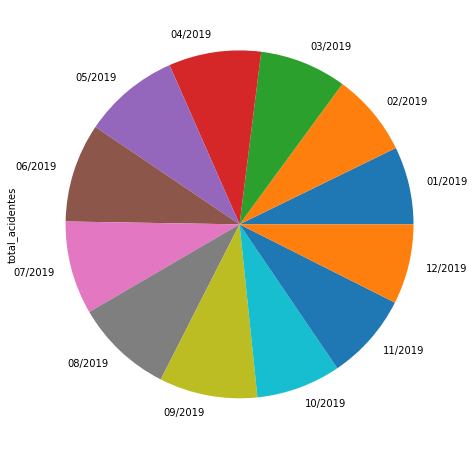

In [135]:
# Gráfico Pizza
pandas_df_acidentes_mes_ano.groupby('mes_ano').total_acidentes.sum().plot.pie(figsize=(8,8))

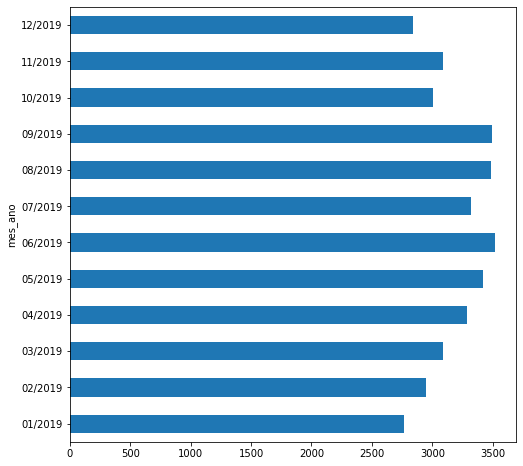

In [136]:
# Gráfico Barras
pandas_df_acidentes_mes_ano.groupby(['mes_ano']).total_acidentes.sum().plot.barh(figsize=(8,8))

Gráficos da Consulta 3


In [137]:
# Convertendo em Pandas
pandas_df_acidentes_pavimento_tempo = df_acidentes_pavimento_tempo.toPandas()

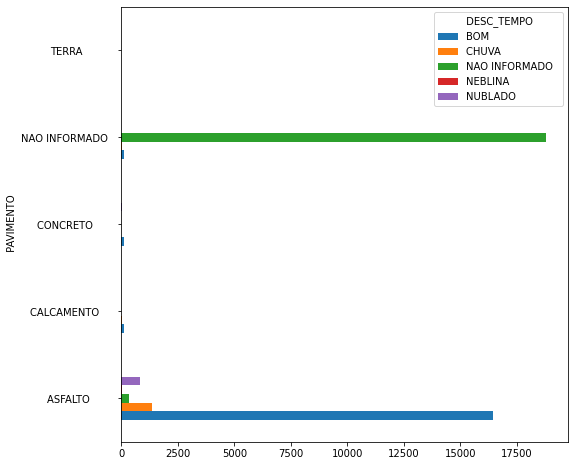

In [138]:
# Gráfico Barras
pandas_df_acidentes_pavimento_tempo.groupby([' PAVIMENTO', ' DESC_TEMPO']).total_acidentes.sum().unstack().plot.barh(figsize=(8,8))